In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, KFold, ShuffleSplit, learning_curve, LeaveOneOut
from sklearn.metrics import accuracy_score, mean_absolute_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier,DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,BaggingClassifier,ExtraTreesClassifier,AdaBoostRegressor
from sklearn.decomposition import PCA, KernelPCA
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.feature_selection import SelectKBest,SelectFromModel,f_classif
#from mlxtend.plotting import plot_decision_regions

ModuleNotFoundError: No module named 'seaborn'

# DataSet

In [3]:
df=pd.DataFrame(pd.read_csv('../top_Gads_updated.dat',header=None, comment="#",sep='\s+',
                            squeeze=True, names=["material","adsorbate","DF_lower","DF_upper","DF"]))


df=df[['material', 'adsorbate','DF']]
aminoacid=df["adsorbate"].unique()

n={}
for i in aminoacid:
    n[i]=list(df[df.adsorbate==i]['DF'])    
X=pd.DataFrame(n)

X.head(5) 
print(X.shape)
aminoacids_label=list(df["adsorbate"].unique())
material_label=list(df["material"].unique())

(33, 32)


# Data Preparation

In [4]:
X.rename(columns={'C3H6': 'PRP','C4H6': 'BUT-2','C4H8': 'BUT-1'}, inplace=True)
X.rename(index={'C_amorph-1':'C-AM-1', 'C_amorph-2':'C-AM-2', 'C_amorph-3':'C-AM-3',
                'CNT15-COO--10':'CNT-COO$^{-}$-high','CNT15-COO--3':'CNT-COO$^{-}$-low',
                'CNT15-COOH-30':'CNT-COOH-high', 'CNT15-COOH-3':'CNT-COOH-low', 
                'CNT15-NH2-14':'CNT-NH$_{2}$-high', 'CNT15-NH2-2':'CNT-NH$_{2}$-low',
                'CNT15-NH3+-4':'CNT-NH$_{3}^{+}$-high', 'CNT15-NH3+-2':'CNT-NH$^{+}_{3}$-low',
                'CNT15-OH-14':'CNT-OH-high', 'CNT15-OH-4':'CNT-OH-low',
                'CNT15':'CNT', 'Fe2O3-001O':'Fe$_{2}$O$_{3}$(001)',
                'graphene':'GR', 'bi-graphene':'bi-GR', 'tri-graphene':'tri-GR', 'grapheneoxide': 'GO', 'redgrapheneoxide': 'rGO',
                'SiO2-Q2': 'SiO$_{2}$-Q2', 'SiO2-Q4':'SiO$_{2}$-Q4',
                'TiO2-rut-110':'TiO$_{2}$-rut(110)' , 'TiO2-ana-101': 'TiO$_{2}$-ana(101)',
                'TiO2-rut-100':'TiO$_{2}$-rut(100)', 'TiO2-ana-100':'TiO$_{2}$-ana(100)', 
                'TiO2-ana-101-NB':'TiO$_{2}$-ana(101)-NB', 
                'ZnO-1010':'ZnO(10$\overline{1}}$0)', 'ZnO-1210':'ZnO(1$\overline{2}}$10)', 'ZnS-110':'ZnS(110)',
                'ZnS-110-coated':'ZnS(110)-coated'}, inplace=True)

In [5]:
main=['ASP','VAL','PRO']
aminacid_order=['ALA', 'ARG', 'ASN', 'ASP', 'CYS', 'CYM','GLN','GAN','GLU',
                'HID', 'HIE', 'HIP','ILE', 'LEU', 'LYS', 'MET',
                'PHE', 'SER', 'THR', 'TRP', 'TYR', 'VAL','GLY','PRO',
                 'CHL','PHO', 'ETA','EST', 'PRP', 'BUT-1','BUT-2',  
                'DGL']

fig, ax = plt.subplots(len(G0), 2, figsize=(10, 25))
fig.subplots_adjust(left=0.06, right=1, wspace=0.2)
X_LR=X[main]
def Mary_LR():
    for i in G0:
        Y=X[i]
        model= LinearRegression()
        model.fit(X_LR, Y)
        ymodel=model.predict(X_LR)
        print(np.round(cross_val_score(model,X_LR,Y,cv=3).mean(),2))
        ax[G0.index(i)][0].scatter(Y,ymodel,c='black',label=i)
        ax[G0.index(i)][0].plot(Y,Y,c='gray',label=np.round(model.score(X_LR,Y),2))
        ax[G0.index(i)][0].legend()
        ax[G0.index(i)][1].bar(main,model.coef_, color='b',width=0.5)
    plt.savefig("LR-G0.pdf")
Mary_LR()

# LinearRegression modelling using test_size=0.3 and 10 ShuffleSplit 

In [7]:
def AminoAcid_LR(i):
    X_LR=X[main]
    Y=X[i]
    rs = ShuffleSplit(n_splits=10, test_size=0.3, random_state=0)
    train_score=[]
    test_score=[]
    train_MAE=[]
    test_MAE=[]
    for train_index, test_index in rs.split(X_LR):  
        Xtrain=X_LR.iloc[list(train_index)]
        Ytrain=Y.iloc[list(train_index)]
        xtest=X_LR.iloc[list(test_index)]
        ytest=Y.iloc[list(test_index)]
        model= LinearRegression()
        model.fit(Xtrain,Ytrain)    
        Ytrain_pred=model.predict(Xtrain)
        ytest_pred=model.predict(xtest)
        train_score.append(np.round(model.score(Xtrain,Ytrain),2))
        test_score.append(np.round(model.score(xtest,ytest),2))
        train_MAE.append(mean_absolute_error(Ytrain,Ytrain_pred)) 
        test_MAE.append(mean_absolute_error(ytest,ytest_pred))
    return(np.round(np.average(train_score),2),np.round(np.std(train_score),2),
           np.round(np.average(test_score),2),np.round(np.std(test_score),2),
           np.round(np.average(train_MAE),2),np.round(np.std(train_MAE),2),
           np.round(np.average(test_MAE),2),np.round(np.std(test_MAE),2))

In [7]:
import warnings
warnings.simplefilter('ignore')
rest=[i for i in aminacid_order if i not in main ]
with open("LR_result.csv", "w") as out_file: 
    out_file.write('#AminoAcid, r2_avg_train, r2_std_train, r2_avg_test, r2_std_test, MAE_avg_train, MAE_std_train, MAE_avg_test, MAE_std_test'+ '\n')
    for i in rest:
        r2_avg_train, r2_std_train, r2_avg_test, r2_std_test, MAE_avg_train, MAE_std_train, MAE_avg_test, MAE_std_test=AminoAcid_LR(i)
        out_file.write("%s %5.2f %5.2f %5.2f %5.2f %5.2f %5.2f %5.2f %5.2f\n" % (i, r2_avg_train, r2_std_train, r2_avg_test, r2_std_test, MAE_avg_train, MAE_std_train, MAE_avg_test, MAE_std_test)+ '\n')

# LinearRegression modelling performance

/tmp/ipykernel_27872/1770714819.py:4: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  df=pd.DataFrame(pd.read_csv('LR_result.csv',header=None, comment="#",sep='\s+',
/tmp/ipykernel_27872/1770714819.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_yticklabels(df.AminoAcid, fontsize=12)


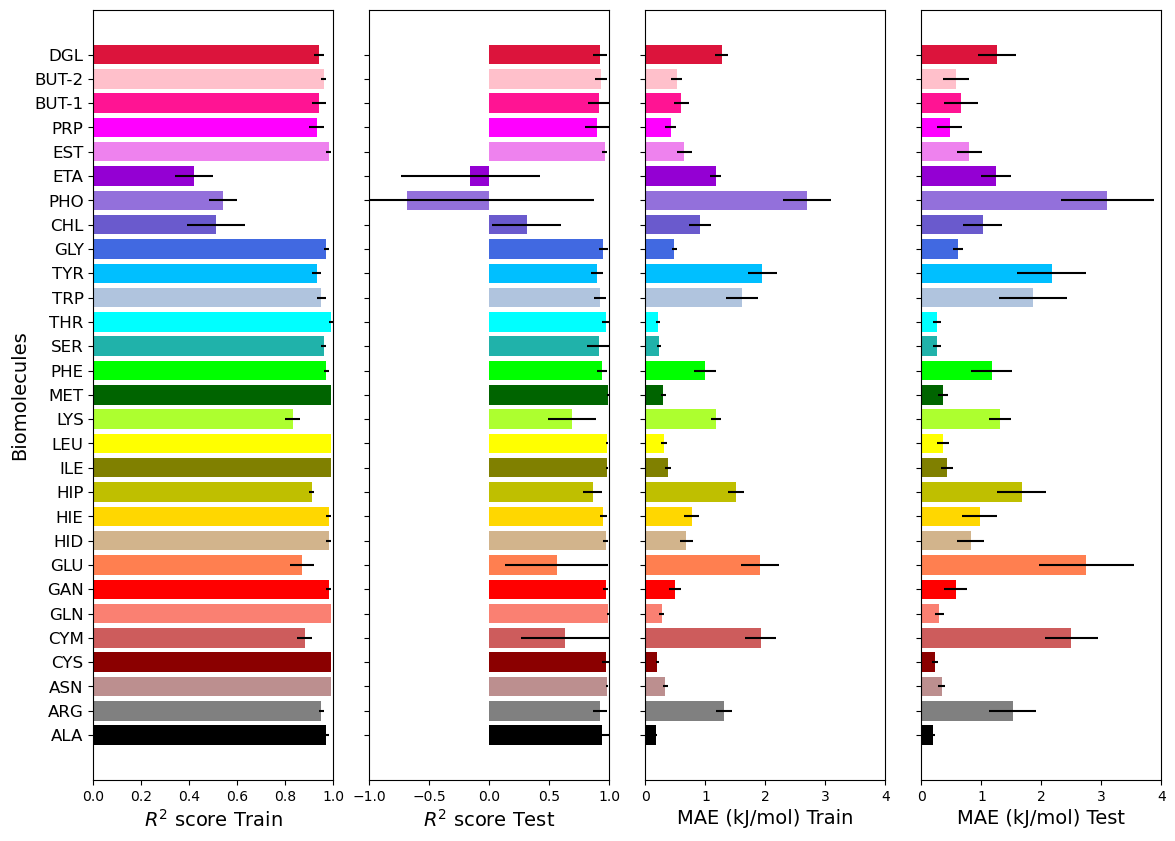

In [3]:
flatui = ["black","grey","rosybrown","darkred","indianred","salmon","red","coral","tan","gold","y","olive","yellow","greenyellow","darkgreen","lime","lightseagreen","aqua","lightsteelblue","deepskyblue","royalblue","slateblue","mediumpurple","darkviolet","violet","magenta","deeppink","pink","crimson"]
fig, ax = plt.subplots(1, 4, figsize=(12, 10),sharey=True)
fig.subplots_adjust(left=0.06, right=0.95, wspace=0.15)
df=pd.DataFrame(pd.read_csv('LR_result.csv',header=None, comment="#",sep='\s+',
                            squeeze=True, 
                            names=['AminoAcid', 'r2_avg_train', 'r2_std_train', 'r2_avg_test', 'r2_std_test', 'MAE_avg_train', 'MAE_std_train', 'MAE_avg_test', 'MAE_std_test']))
ax[0].barh(df.AminoAcid,df.r2_avg_train ,xerr= df.r2_std_train, color=flatui)
ax[0].set_xlabel('$R^2$ score Train',fontsize=14)
ax[0].set_yticklabels(df.AminoAcid, fontsize=12)
ax[0].set_xlim(-1,1)

ax[0].set_xlim(0,1)
ax[1].barh(df.AminoAcid,df.r2_avg_test ,xerr= df.r2_std_test,color=flatui)
ax[1].set_xlabel('$R^2$ score Test',fontsize=14)
ax[1].set_xlim(-1,1)

ax[2].barh(df.AminoAcid,df.MAE_avg_train,xerr= df.MAE_std_train,color=flatui )
ax[2].set_xlabel('MAE (kJ/mol) Train',fontsize=14)
ax[2].set_xlim(0,4)

ax[3].barh(df.AminoAcid,df.MAE_avg_test,xerr= df.MAE_std_test,color=flatui)
ax[3].set_xlabel('MAE (kJ/mol) Test',fontsize=14);
ax[3].set_xlim(0,4)

ax[0].set_ylabel('Biomolecules',fontsize=14)
plt.savefig('LR_result.png', format='png', dpi=1000, bbox_inches='tight')

In [59]:
#modify the main 
main=['ASP','VAL','PRO','ETA','PHO']

In [60]:
def AminoAcid_LR(i):
    X_LR=X[main]
    Y=X[i]
    rs = ShuffleSplit(n_splits=20, test_size=0.3, random_state=0)
    train_score=[]
    test_score=[]
    train_MAE=[]
    test_MAE=[]
    for train_index, test_index in rs.split(X_LR):  
        Xtrain=X_LR.iloc[list(train_index)]
        Ytrain=Y.iloc[list(train_index)]
        xtest=X_LR.iloc[list(test_index)]
        ytest=Y.iloc[list(test_index)]
        model= LinearRegression()
        model.fit(Xtrain,Ytrain)    
        Ytrain_pred=model.predict(Xtrain)
        ytest_pred=model.predict(xtest)
        train_score.append(np.round(model.score(Xtrain,Ytrain),2))
        test_score.append(np.round(model.score(xtest,ytest),2))
        train_MAE.append(mean_absolute_error(Ytrain,Ytrain_pred)) 
        test_MAE.append(mean_absolute_error(ytest,ytest_pred))
    return(np.round(np.average(train_score),2),np.round(np.std(train_score),2),
           np.round(np.average(test_score),2),np.round(np.std(test_score),2),
           np.round(np.average(train_MAE),2),np.round(np.std(train_MAE),2),
           np.round(np.average(test_MAE),2),np.round(np.std(test_MAE),2))

In [61]:
import warnings
warnings.simplefilter('ignore')
rest=[i for i in aminacid_order if i not in main ]
with open("LR_modify_result.csv", "w") as out_file: 
    out_file.write('#AminoAcid, r2_avg_train, r2_std_train, r2_avg_test, r2_std_test, MAE_avg_train, MAE_std_train, MAE_avg_test, MAE_std_test'+ '\n')
    for i in rest:
        r2_avg_train, r2_std_train, r2_avg_test, r2_std_test, MAE_avg_train, MAE_std_train, MAE_avg_test, MAE_std_test=AminoAcid_LR(i)
        out_file.write("%s %5.2f %5.2f %5.2f %5.2f %5.2f %5.2f %5.2f %5.2f\n" % (i, r2_avg_train, r2_std_train, r2_avg_test, r2_std_test, MAE_avg_train, MAE_std_train, MAE_avg_test, MAE_std_test)+ '\n')

/tmp/ipykernel_27872/3337223957.py:8: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  df=pd.DataFrame(pd.read_csv('LR_modify_result.csv',header=None, comment="#",sep='\s+',
/tmp/ipykernel_27872/3337223957.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_yticklabels(df.AminoAcid, fontsize=12)


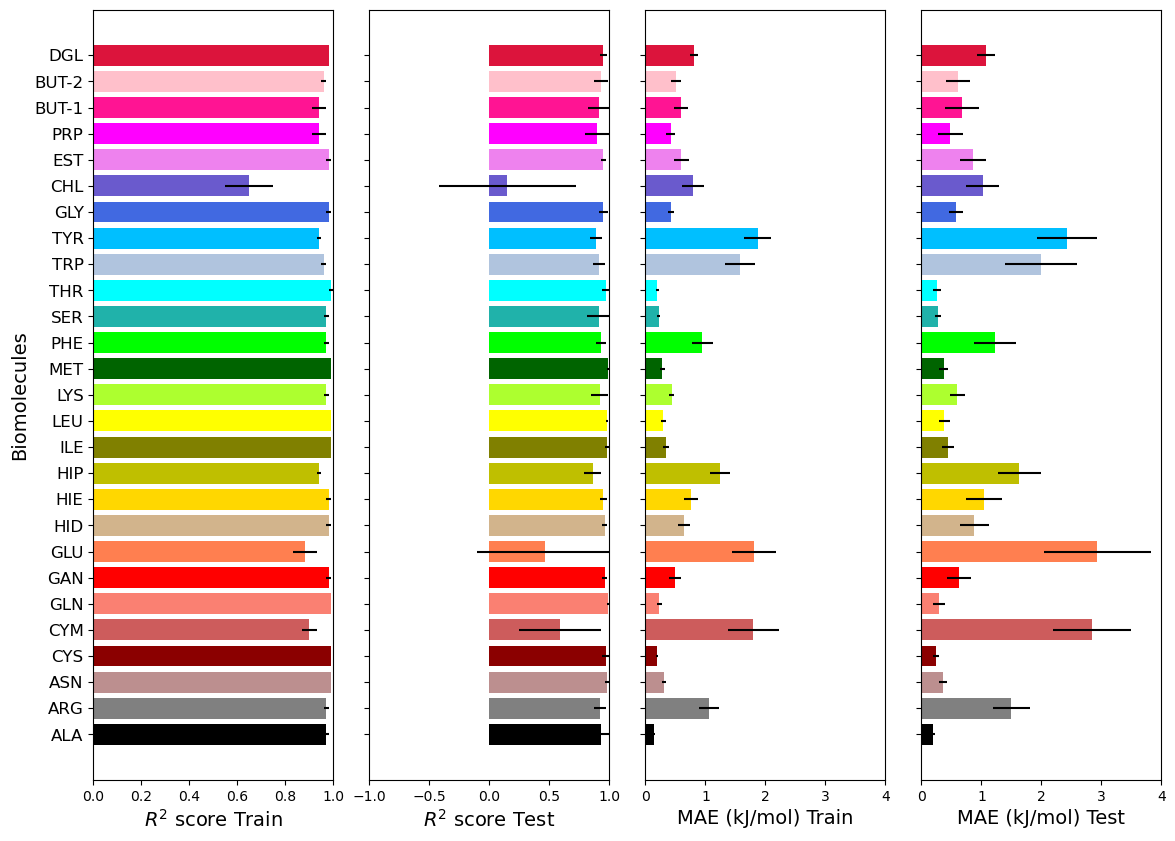

In [4]:
flatui = ["black","grey","rosybrown","darkred","indianred","salmon","red","coral","tan","gold","y","olive","yellow",
          "greenyellow","darkgreen","lime","lightseagreen","aqua","lightsteelblue","deepskyblue","royalblue",
          "slateblue","violet","magenta","deeppink","pink","crimson"]


fig, ax = plt.subplots(1, 4, figsize=(12, 10),sharey=True)
fig.subplots_adjust(left=0.06, right=0.95, wspace=0.15)
df=pd.DataFrame(pd.read_csv('LR_modify_result.csv',header=None, comment="#",sep='\s+',
                            squeeze=True, 
                            names=['AminoAcid', 'r2_avg_train', 'r2_std_train', 'r2_avg_test', 'r2_std_test', 'MAE_avg_train', 'MAE_std_train', 'MAE_avg_test', 'MAE_std_test']))
ax[0].barh(df.AminoAcid,df.r2_avg_train ,xerr= df.r2_std_train, color=flatui)
ax[0].set_xlabel('$R^2$ score Train',fontsize=14)
ax[0].set_xlim(0,1)
ax[0].set_yticklabels(df.AminoAcid, fontsize=12)

ax[1].barh(df.AminoAcid,df.r2_avg_test ,xerr= df.r2_std_test,color=flatui)
ax[1].set_xlabel('$R^2$ score Test',fontsize=14)
ax[1].set_xlim(-1,1)

ax[2].barh(df.AminoAcid,df.MAE_avg_train,xerr= df.MAE_std_train,color=flatui )
ax[2].set_xlabel('MAE (kJ/mol) Train',fontsize=14)
ax[2].set_xlim(0,4)

ax[3].barh(df.AminoAcid,df.MAE_avg_test,xerr= df.MAE_std_test,color=flatui)
ax[3].set_xlabel('MAE (kJ/mol) Test',fontsize=14)
ax[3].set_xlim(0,4)

ax[0].set_ylabel('Biomolecules',fontsize=14)
plt.savefig('LR_modify_result.png', format='png', dpi=1000, bbox_inches='tight')

# Predicted vs Real vales for testing data set (one of 10)

In [10]:
def Mary_pred(i):
        Y=X[i]
        Xtrain,xtest,Ytrain,ytest=train_test_split(X_LR,Y,test_size=0.3, random_state=99)
        model= LinearRegression()
        model.fit(Xtrain,Ytrain)
        ytest_pred=model.predict(xtest)
        test_score=np.round(model.score(xtest,ytest),2)
        d = {'Aminoacid':i ,'Predict':list(ytest_pred),'Real':list(ytest), 'score':test_score,'Method':'LR'}
        return(d)        

In [9]:
main=['ASP','VAL','PRO','ETA','PHO']
rest=[i for i in aminacid_order if i not in main]
X_LR=X[main]
df_list=[]
for i in rest:
    df= pd.DataFrame.from_dict(Mary_pred(i))
    df_list.append(df)        
result=pd.concat(df_list, ignore_index=True)
result.to_csv('LR_ypredict-yreal.csv')

# Combing results of other modelling and make a figure of predicted vs real modelling 

In [5]:
profile1=pd.DataFrame(pd.read_csv('LR_ypredict-yreal.csv'), columns=['Aminoacid','Predict','Real','score','Method'])
profile2=pd.DataFrame(pd.read_csv('AdaBoost_ypredict-yreal.csv'), columns=['Aminoacid','Predict','Real','score','Method'])
profile3=pd.DataFrame(pd.read_csv('NN_ypredict-yreal.csv'), columns=['Aminoacid','Predict','Real','score','Method'])
profiletot= pd.concat([profile1,profile2,profile3])

In [6]:
profiletot.groupby("Method").mean()

,Predict,Real,score
Method,,,
AdaBoost,-3.208497,-3.446067,0.851852
LR,-4.175035,-4.255783,0.891111
NN,-2.823465,-2.907650,0.772963


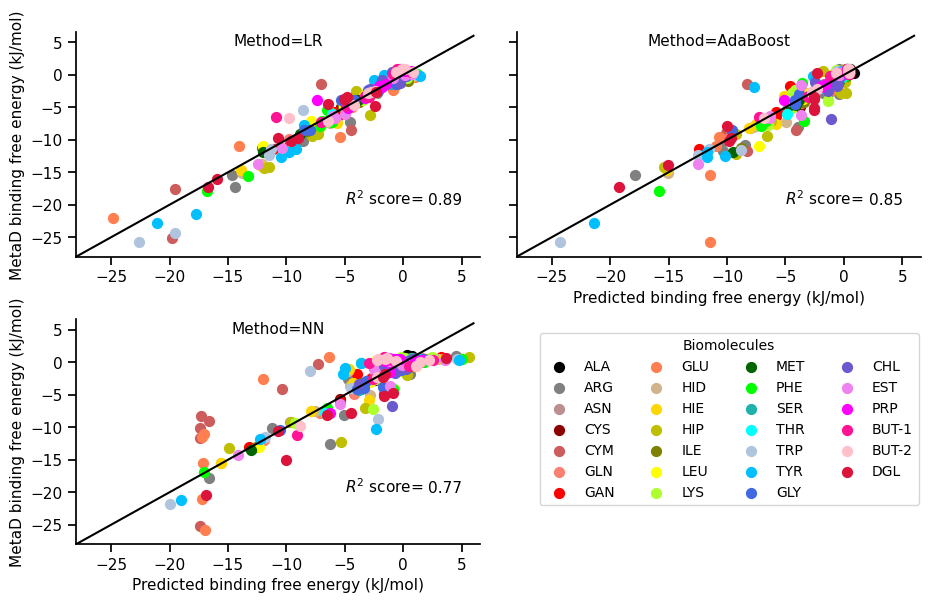

In [77]:
flatui = ["black","grey","rosybrown","darkred","indianred","salmon","red","coral","tan","gold","y","olive","yellow",
          "greenyellow","darkgreen","lime","lightseagreen","aqua","lightsteelblue","deepskyblue","royalblue",
          "slateblue","violet","magenta","deeppink","pink","crimson"]

with sns.plotting_context("notebook", font_scale=1.0):
        g=sns.FacetGrid(profiletot, hue="Aminoacid",col='Method',col_wrap=2,
                margin_titles=False,palette=sns.color_palette(flatui),xlim=(-28,6.6),ylim=(-28,6.6),
                aspect=1.5, height=3.5,
                sharex=False, sharey=True)
g.map(plt.scatter,"Predict","Real", marker='.',s=200)


M=[0.89, 0.85, 0.77]
col_n = 0
for ax in g.fig.axes:
    ax.plot(list(np.arange(-28,7,1)),list(np.arange(-28,7,1)),color='black')
    ax.text(-5, -20, '$R^2$ score=', fontsize= 11)
    ax.text(2.15, -20, M[col_n], fontsize= 11)
    col_n += 1
    

g.set_axis_labels(r"Predicted binding free energy (kJ/mol)",r"MetaD binding free energy (kJ/mol)",fontsize=11)
g.set_titles(r"Method={col_name}",loc="center", y=0.90, size=11)
g.fig.tight_layout(pad=5, h_pad=1, w_pad=2)
plt.legend(title='Biomolecules',ncol=4,loc='upper right', bbox_to_anchor=(2.1, 0.97))
g.savefig("tot_ypredict-yreal-pic.pdf", dpi=1000)

# LinearRegression modelling performance for all biomolecules

In [13]:
df=pd.DataFrame(pd.read_csv('LR_result.csv',header=None, comment="#",sep='\s+',
                            squeeze=True, names=['AminoAcid', 'r2_avg_train', 'r2_std_train', 'r2_avg_test', 'r2_std_test', 'MAE_avg_train', 'MAE_std_train', 'MAE_avg_test', 'MAE_std_test']))
df.describe()

/tmp/ipykernel_14960/4048209594.py:1: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  df=pd.DataFrame(pd.read_csv('LR_result.csv',header=None, comment="#",sep='\s+',


,r2_avg_train,r2_std_train,r2_avg_test,r2_std_test,MAE_avg_train,MAE_std_train,MAE_avg_test,MAE_std_test
count,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000
mean,0.906207,0.021034,0.794828,0.152414,0.877241,0.121379,1.026552,0.265862
std,0.150176,0.026772,0.377128,0.304955,0.663227,0.094858,0.806072,0.207149
min,0.420000,0.000000,-0.690000,0.010000,0.170000,0.020000,0.190000,0.030000
25%,0.930000,0.010000,0.900000,0.020000,0.330000,0.040000,0.360000,0.090000
50%,0.960000,0.010000,0.930000,0.050000,0.650000,0.100000,0.800000,0.220000
75%,0.980000,0.030000,0.970000,0.100000,1.270000,0.140000,1.310000,0.340000
max,0.990000,0.120000,0.990000,1.560000,2.700000,0.400000,3.100000,0.790000
